# Metagenome assembled genomes (MAG) analysis 

In [4]:
#pip install biom-format
pip install scikit-bio


SyntaxError: invalid syntax (1082587019.py, line 2)

In [27]:
from biom import load_table

# Specify the path to your Biom file
biom_file_path = "/Users/jugomez/Documents/CAUSE_Project/MA_C/for_analyze_with_microbiomedb.biom"

# Load the Biom table
table = load_table(biom_file_path)

# Access the data in the Biom table
print("Number of samples:", table.shape[0])
print("Number of observations (features):", table.shape[1])
print("Table data:\n", table.head())


Number of samples: 2871
Number of observations (features): 10
Table data:
 # Constructed from biom file
#OTU ID	W304B-1	W304B-10	W304B-2	W304B-3	W304B-4
id2841257	0.0	0.0	0.0	0.0	0.0
id2962672	0.0	0.0	0.0	0.0	1.0
id2931976	1.0	0.0	0.0	0.0	0.0
id2866382	1.0	0.0	0.0	0.0	0.0
id2039234	0.0	0.0	0.0	0.0	0.0


In [2]:
from biom import load_table
from skbio.diversity import alpha_diversity, beta_diversity
from skbio.stats.ordination import pcoa
import pandas as pd

# Load Biom file
biom_file_path = "/Users/jugomez/Documents/CAUSE_Project/MA_C/for_analyze_with_microbiomedb.biom"
table = load_table(biom_file_path)

# Basic summary statistics
print("Number of samples:", table.shape[0])
print("Number of observations (features):", table.shape[1])
print("Total counts per sample:")
print(table.sum(axis='observation'))

# Alpha diversity analysis (Shannon diversity)
alpha_div = alpha_diversity('shannon', table.to_dataframe().fillna(0), ids=table.ids())
print("Alpha Diversity (Shannon):", alpha_div)

# Beta diversity analysis (Bray-Curtis dissimilarity)
beta_div = beta_diversity('braycurtis', table.to_dataframe().fillna(0))
pcoa_results = pcoa(beta_div)
print("PCoA Results:")
print(pcoa_results)

# Taxonomic composition analysis (if applicable)
# Replace "taxonomy" with the appropriate metadata category containing taxonomic information
taxonomy = table.metadata_to_dataframe(axis='observation')['taxonomy']
print("Taxonomic Composition:")
print(taxonomy)

# Differential abundance analysis (if applicable)
# Perform statistical tests to identify differentially abundant features between groups of samples
# (e.g., using DESeq2, ANCOM, or other methods)


ModuleNotFoundError: No module named 'skbio'

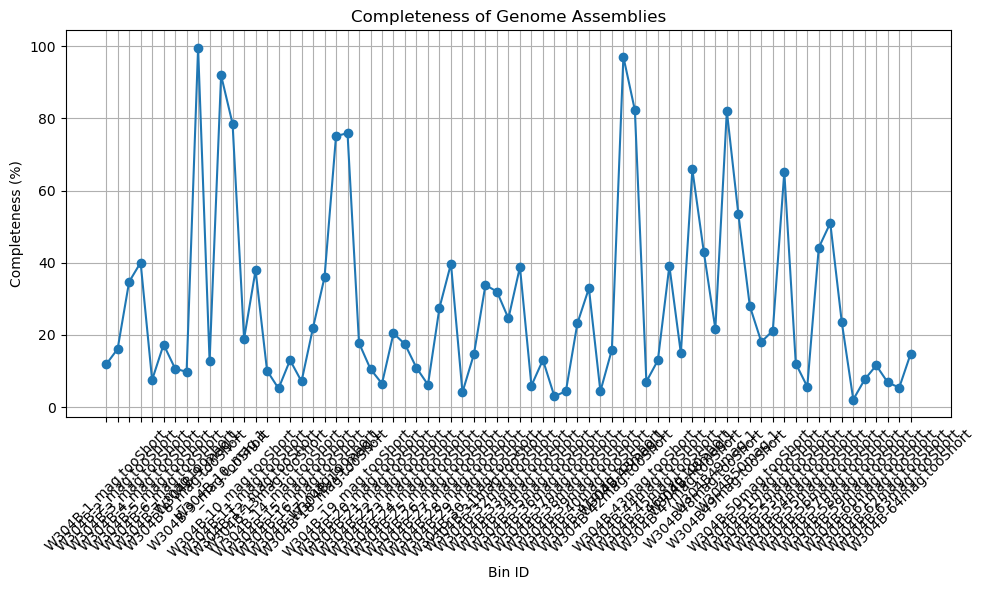

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV file
df = pd.read_csv('/Users/jugomez/Documents/CAUSE_Project/Microbial Reads/MAG_SUMMARY_COMBINE.csv')  # Replace 'your_file.csv' with the actual file path

# Extracting relevant columns
bin_ids = df['Bin Id1']
completeness = df['Completeness']

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(bin_ids, completeness, marker='o', linestyle='-')
plt.title('Completeness of Genome Assemblies')
plt.xlabel('Bin ID')
plt.ylabel('Completeness (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


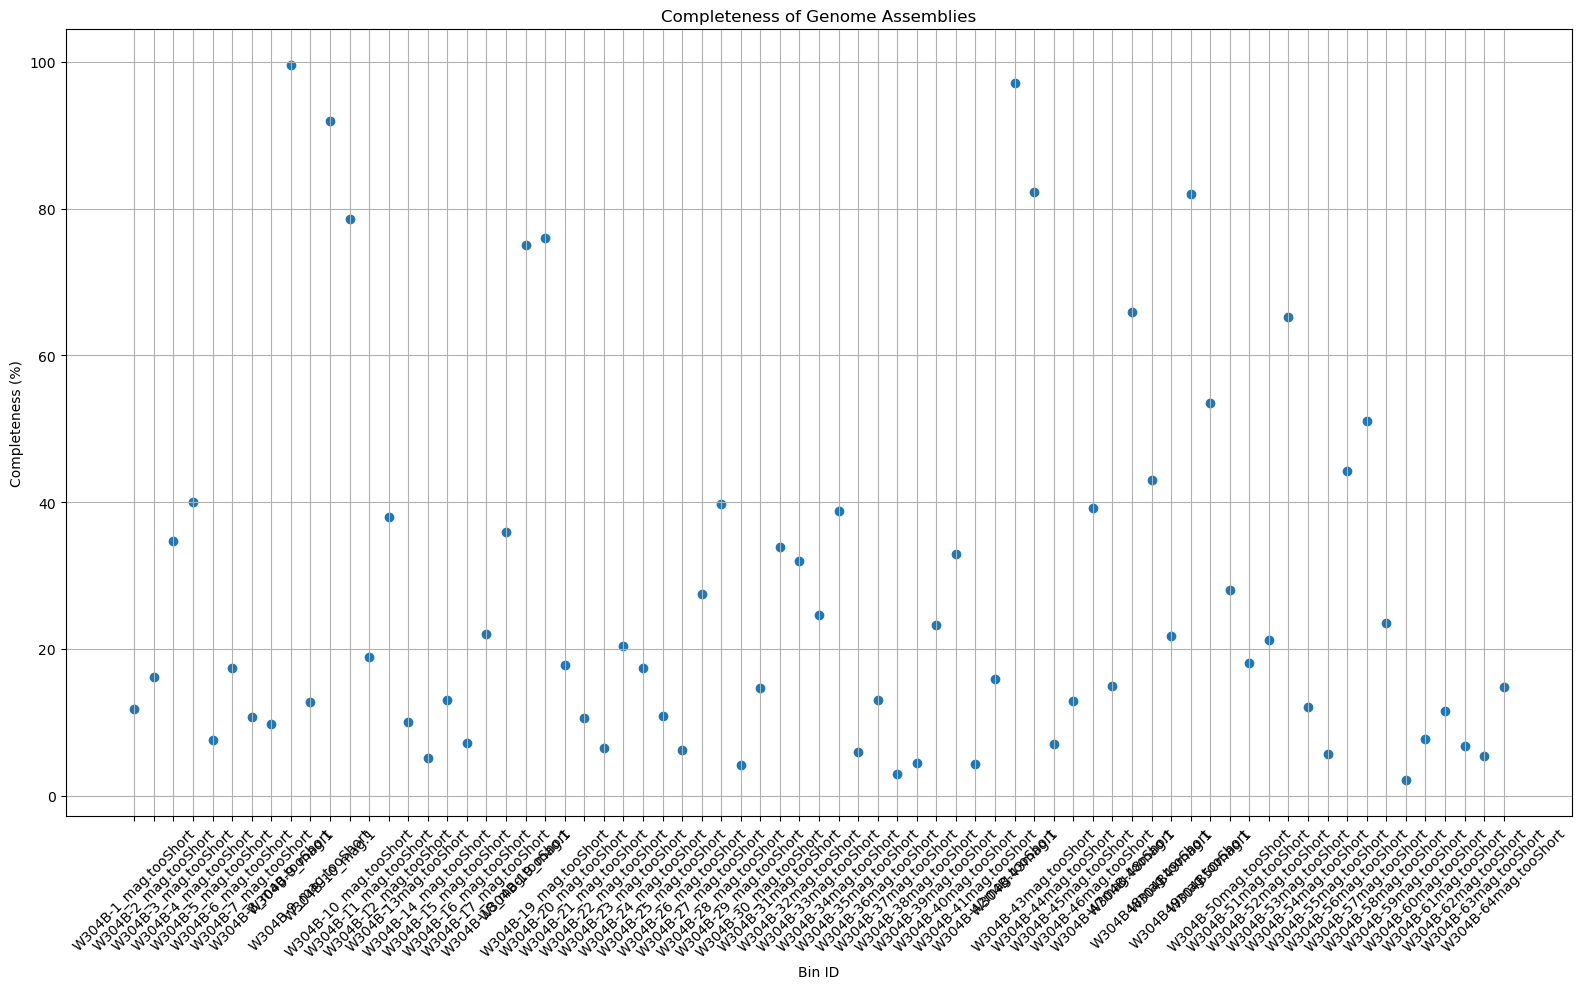

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV file
df = pd.read_csv('/Users/jugomez/Documents/CAUSE_Project/Microbial Reads/MAG_SUMMARY_COMBINE.csv')  # Replace 'your_file.csv' with the actual file path

# Extracting relevant columns
bin_ids = df['Bin Id1']
completeness = df['Completeness']

# Create the scatter plot
plt.figure(figsize=(16, 10))
plt.scatter(bin_ids, completeness, marker='o')
plt.title('Completeness of Genome Assemblies')
plt.xlabel('Bin ID')
plt.ylabel('Completeness (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


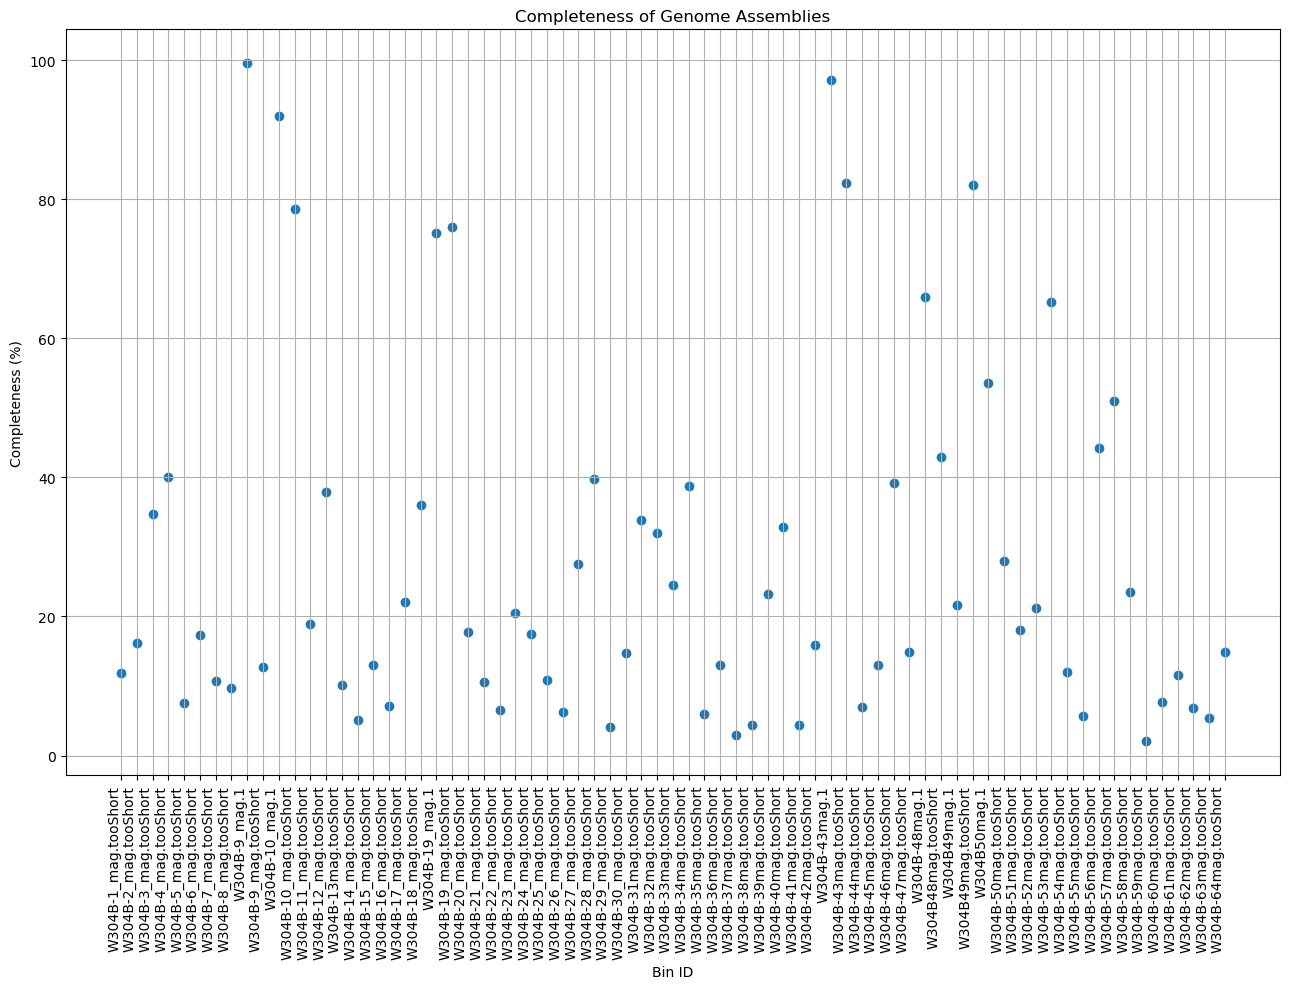

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV file
df = pd.read_csv('/Users/jugomez/Documents/CAUSE_Project/Microbial Reads/MAG_SUMMARY_COMBINE.csv')  # Replace 'your_file.csv' with the actual file path

# Extracting relevant columns
bin_ids = df['Bin Id1']
completeness = df['Completeness']

# Create the scatter plot
plt.figure(figsize=(13, 10))
plt.scatter(bin_ids, completeness, marker='o')
plt.title('Completeness of Genome Assemblies')
plt.xlabel('Bin ID')
plt.ylabel('Completeness (%)')
plt.xticks(rotation=90, ha='right')  # Rotate labels and adjust alignment
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()



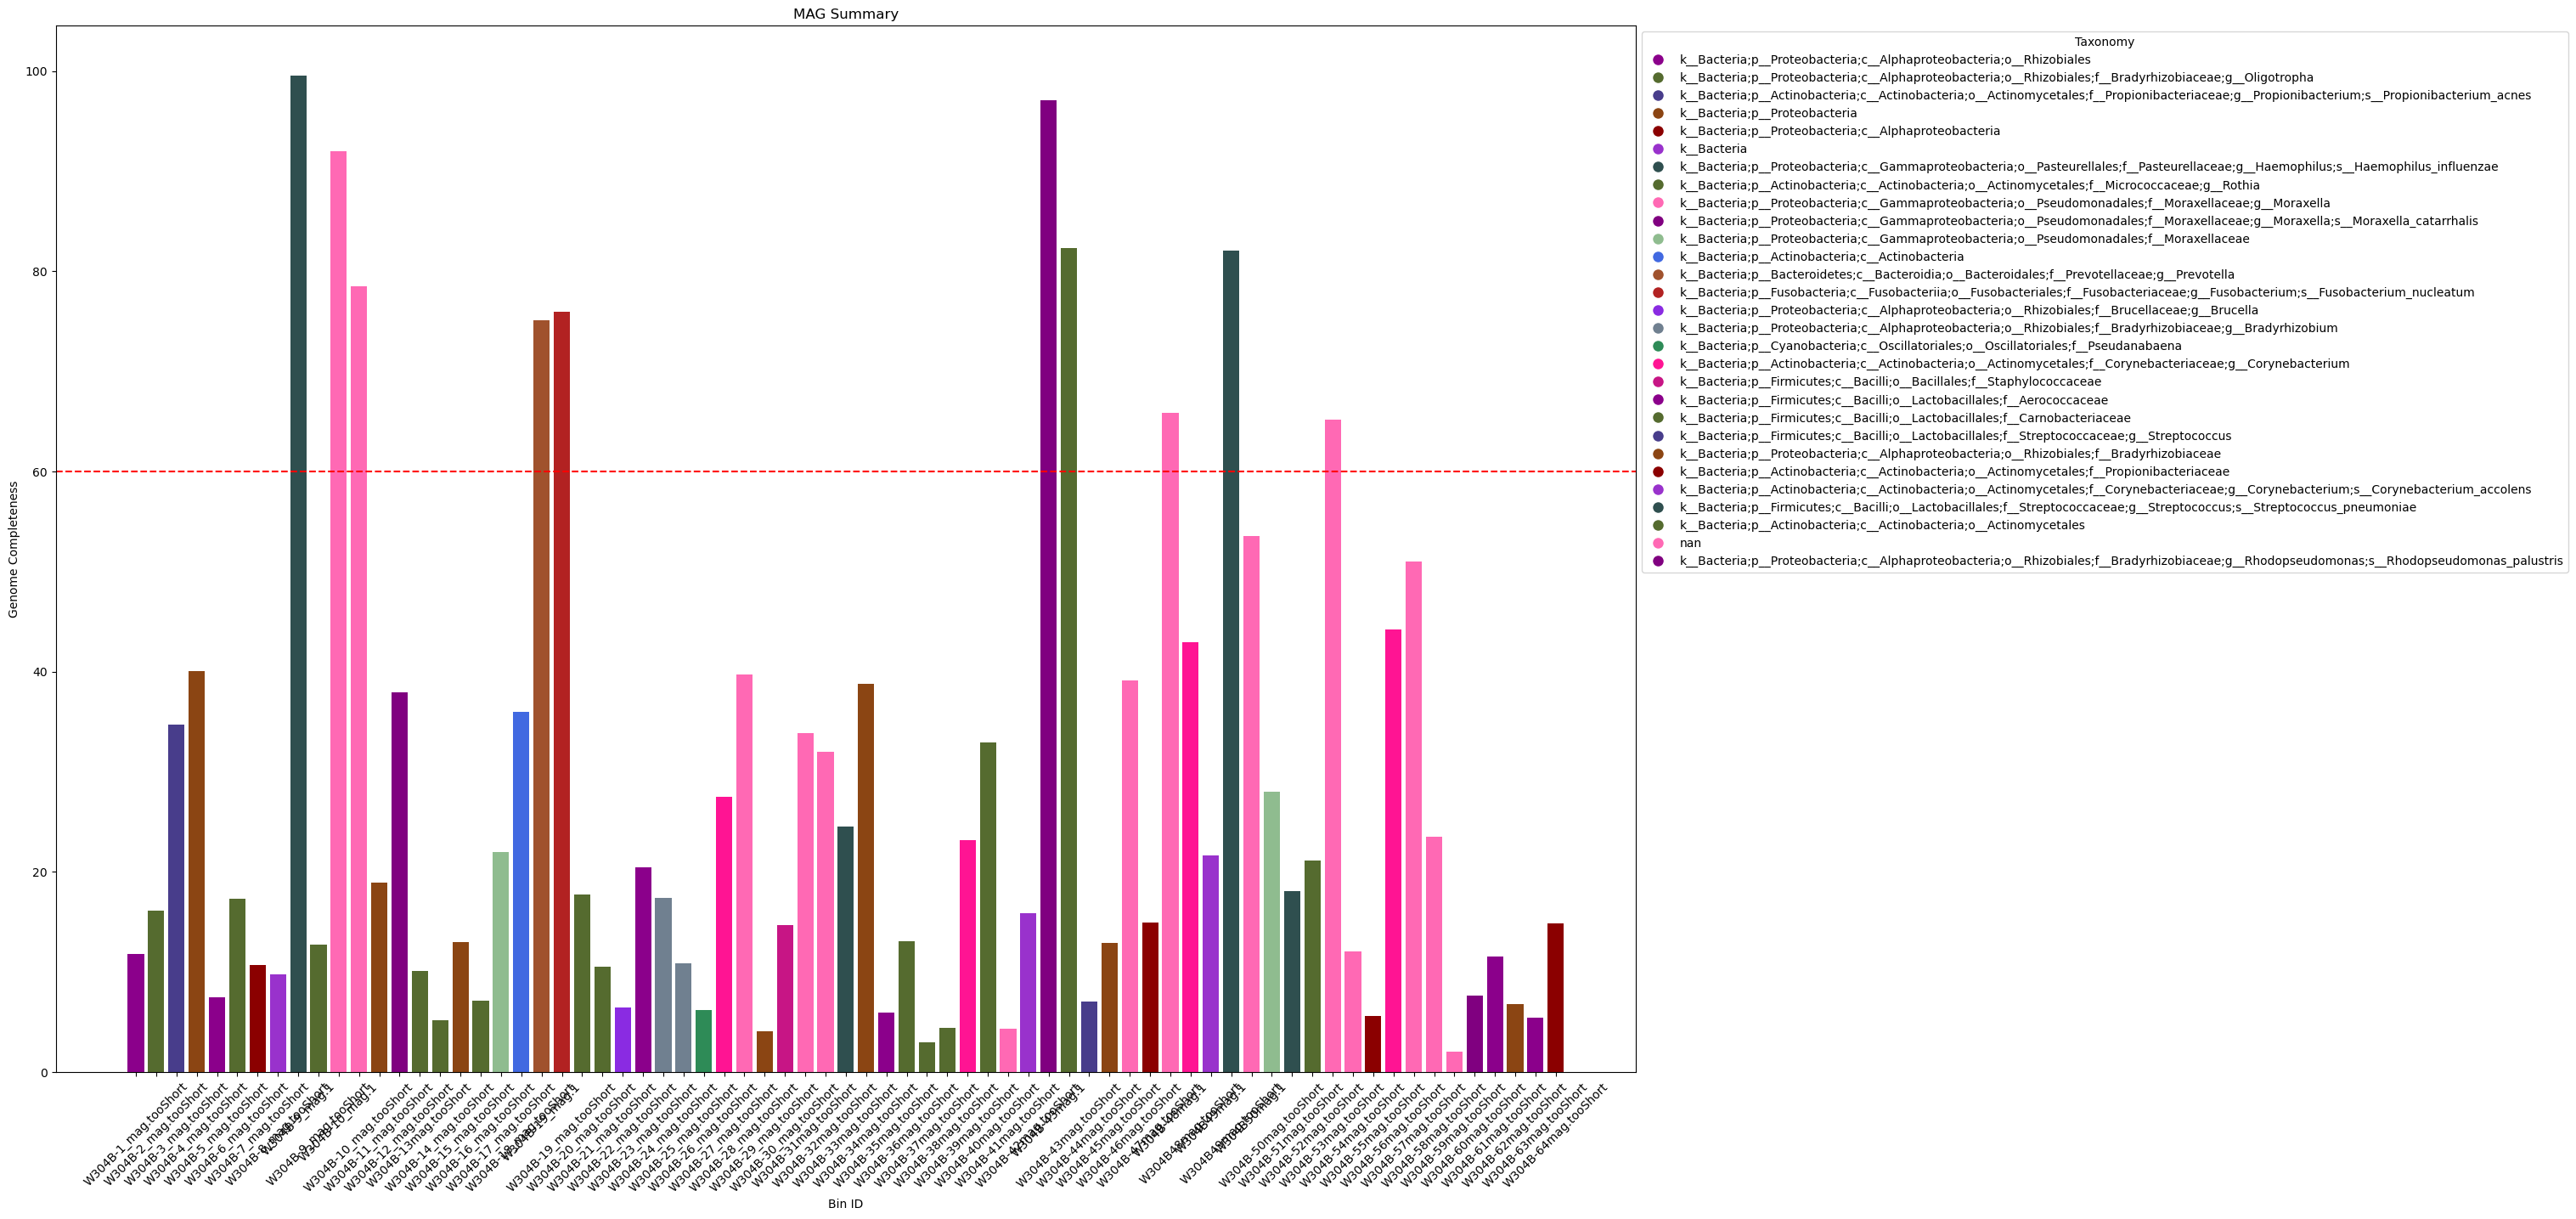

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file into a DataFrame with a comma as the delimiter
file_path = '/Users/jugomez/Documents/CAUSE_Project/Microbial Reads/MAG_SUMMARY_COMBINE.csv'
df = pd.read_csv(file_path, delimiter=',')

# Extract relevant columns for the bar plot
selected_columns = ['Bin Id1', 'Taxonomy', 'Completeness']
df_selected = df[selected_columns]

# Rename the column 'Taxonomy (contained)' to 'Taxonomy'
df_selected = df_selected.rename(columns={'Taxonomy': 'Taxonomy'})

# Set 'Bin Id1' as the index for better readability
df_selected.set_index('Bin Id1', inplace=True)

# Create a dictionary to map unique taxonomies to colors
taxonomy_color_mapping = {}
color_index = 0

# Get the number of bars
num_bars = len(df_selected)

# Specify custom dark pastel colors for each bar
dark_pastel_colors = [
    '#8B008B', '#556B2F', '#483D8B', '#8B4513', '#8B0000', '#9932CC', '#2F4F4F', '#556B2F', '#FF69B4',
    '#800080', '#8FBC8F', '#4169E1', '#A0522D', '#B22222', '#8A2BE2', '#708090', '#2E8B57', '#FF1493', '#C71585'
]

# Plotting with custom colors
fig, ax = plt.subplots(figsize=(24, 16))

legend_handles = []
legend_labels = []

for idx, (bar_id, row) in enumerate(df_selected.iterrows()):
    taxonomy = row['Taxonomy']
    
    # Check if the taxonomy has been assigned a color
    if taxonomy not in taxonomy_color_mapping:
        # Assign a color and update the mapping
        color = dark_pastel_colors[color_index % len(dark_pastel_colors)]
        taxonomy_color_mapping[taxonomy] = color
        color_index += 1
    else:
        # Use the color assigned to the taxonomy
        color = taxonomy_color_mapping[taxonomy]

    bar = ax.bar(bar_id, row['Completeness'], color=color, width=0.8, label=row['Taxonomy'])
    legend_handles.append(bar)
    legend_labels.append(row['Taxonomy'])

ax.set_xlabel('Bin ID')
ax.set_ylabel('Genome Completeness')
ax.set_title('MAG Summary')

# Rotate x-axis labels
ax.tick_params(axis='x', rotation=45)

# Set x-axis ticks and labels for better readability
ax.set_xticks(np.arange(num_bars))
ax.set_xticklabels(df_selected.index)

# Add a legend for each unique taxonomy
unique_taxonomy_legend = []
unique_taxonomy_colors = []

for taxonomy, color in taxonomy_color_mapping.items():
    unique_taxonomy_legend.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10))
    unique_taxonomy_colors.append(taxonomy)

ax.legend(unique_taxonomy_legend, unique_taxonomy_colors, title='Taxonomy', bbox_to_anchor=(1, 1))

# Add a red line at 70% on the y-axis
ax.axhline(y=60, color='red', linestyle='--', label='60% Completeness')

plt.show()


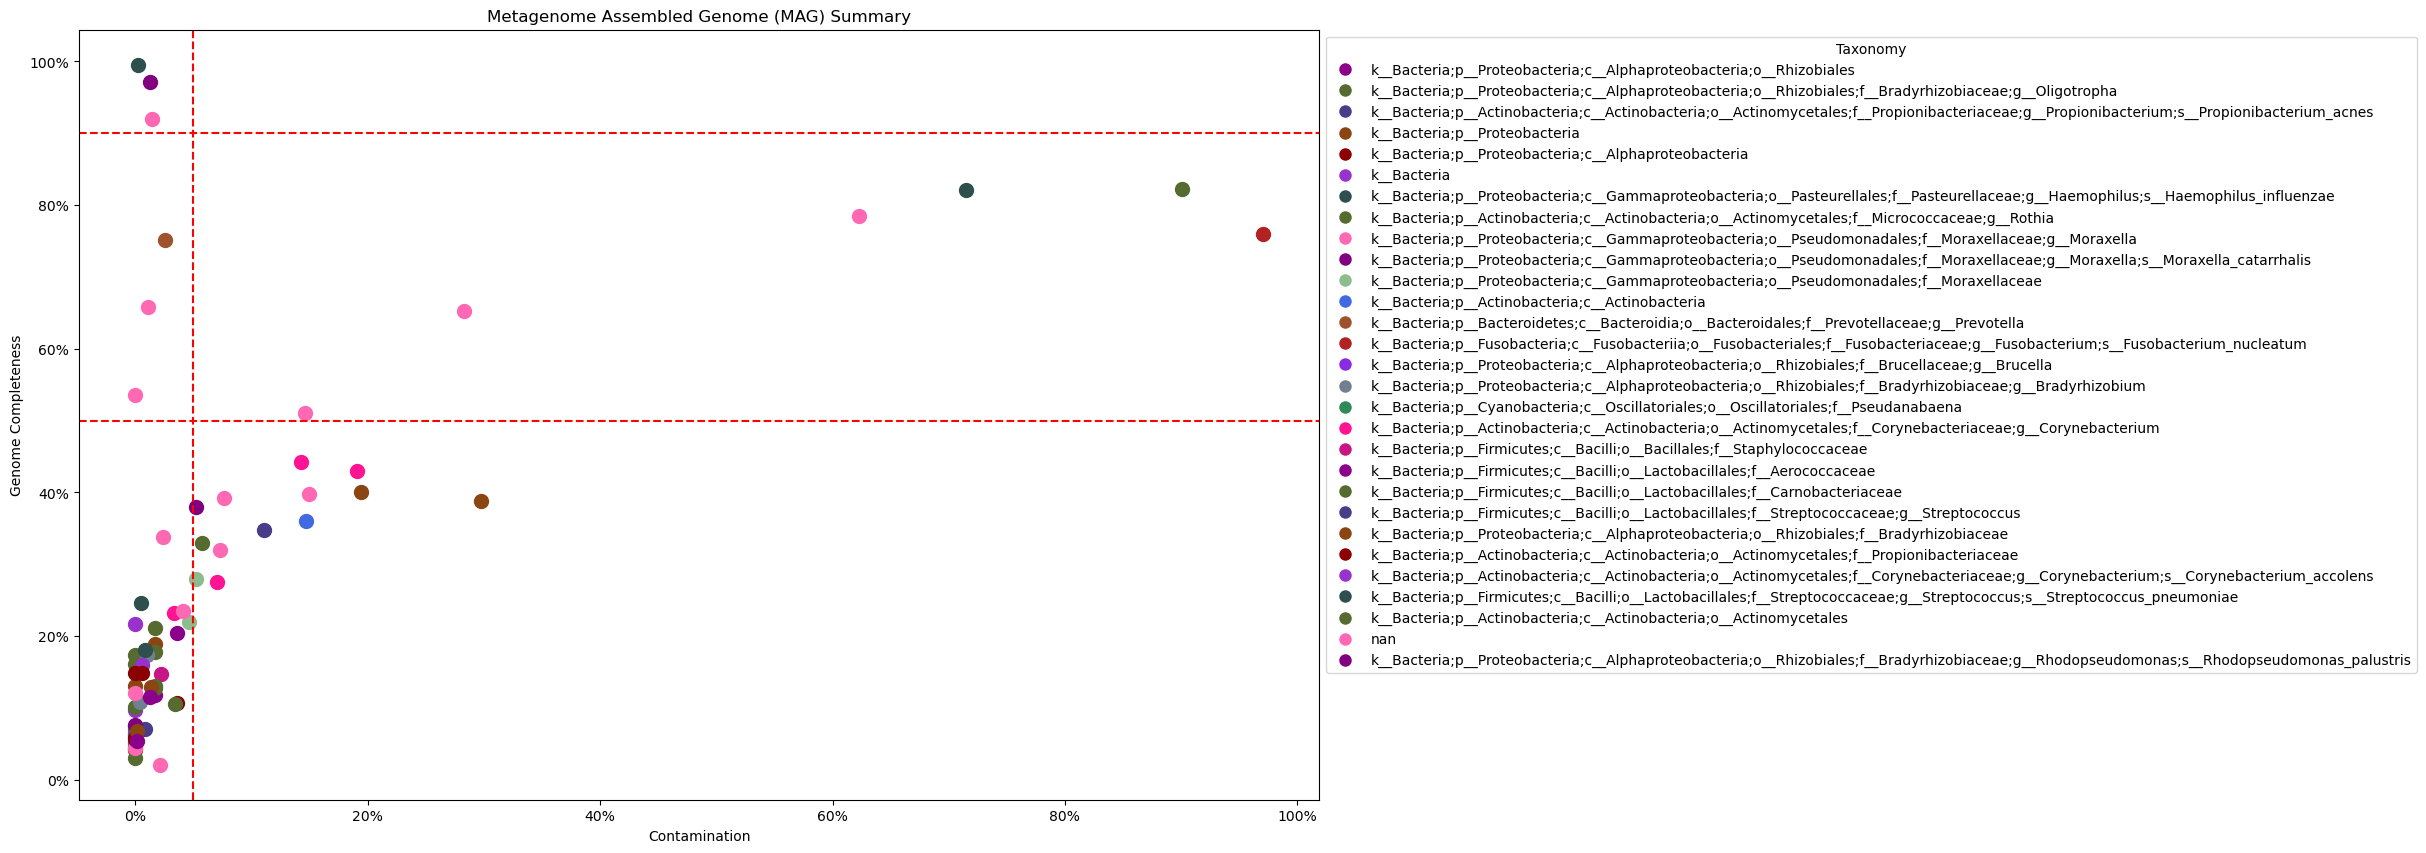

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# Load the CSV file into a DataFrame with a comma as the delimiter
file_path = '/Users/jugomez/Documents/CAUSE_Project/Microbial Reads/MAG_SUMMARY_COMBINE.csv'
df = pd.read_csv(file_path, delimiter=',')

# Extract relevant columns for the scatter plot
selected_columns = ['Bin Id1', 'Taxonomy', 'Completeness', 'Contamination']
df_selected = df[selected_columns]

# Create a dictionary to map unique taxonomies to colors
taxonomy_color_mapping = {}
color_index = 0

# Get the number of points
num_points = len(df_selected)

# Specify custom dark pastel colors for each point
dark_pastel_colors = [
    '#8B008B', '#556B2F', '#483D8B', '#8B4513', '#8B0000', '#9932CC', '#2F4F4F', '#556B2F', '#FF69B4',
    '#800080', '#8FBC8F', '#4169E1', '#A0522D', '#B22222', '#8A2BE2', '#708090', '#2E8B57', '#FF1493', '#C71585'
]

# Plotting with custom colors
fig, ax = plt.subplots(figsize=(16, 10))

legend_handles = []
legend_labels = []

for idx, (_, row) in enumerate(df_selected.iterrows()):
    taxonomy = row['Taxonomy']
    
    # Check if the taxonomy has been assigned a color
    if taxonomy not in taxonomy_color_mapping:
        # Assign a color and update the mapping
        color = dark_pastel_colors[color_index % len(dark_pastel_colors)]
        taxonomy_color_mapping[taxonomy] = color
        color_index += 1
    else:
        # Use the color assigned to the taxonomy
        color = taxonomy_color_mapping[taxonomy]

    point = ax.scatter(row['Contamination'], row['Completeness'], color=color, s=100, label=row['Taxonomy'])
    legend_handles.append(point)
    legend_labels.append(row['Taxonomy'])

ax.set_xlabel('Contamination')
ax.set_ylabel('Genome Completeness')
ax.set_title('Metagenome Assembled Genome (MAG) Summary')

# Format the x-axis and y-axis tick labels as percentages
percent_formatter = FuncFormatter(lambda x, _: f'{int(x)}%')
ax.xaxis.set_major_formatter(percent_formatter)
ax.yaxis.set_major_formatter(percent_formatter)

# Add a legend for each unique taxonomy
unique_taxonomy_legend = []
unique_taxonomy_colors = []

for taxonomy, color in taxonomy_color_mapping.items():
    unique_taxonomy_legend.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10))
    unique_taxonomy_colors.append(taxonomy)

ax.legend(unique_taxonomy_legend, unique_taxonomy_colors, title='Taxonomy', bbox_to_anchor=(1, 1))

# Add a dashed line at 10% contamination
ax.axvline(x=5, color='red', linestyle='--', label='5% Contamination')

# Add a red line at 60% on the y-axis
ax.axhline(y=90, color='red', linestyle='--', label='90% Completeness')
# Add a red line at 60% on the y-axis
ax.axhline(y=50, color='red', linestyle='--', label='50% Completeness')

plt.show()


Taxa with Completeness over 60%:
                                                                Taxonomy  \
Bin Id1                                                                    
W304B-9_mag.1          k__Bacteria;p__Proteobacteria;c__Gammaproteoba...   
W304B-10_mag.1         k__Bacteria;p__Proteobacteria;c__Gammaproteoba...   
W304B-10_mag.tooShort  k__Bacteria;p__Proteobacteria;c__Gammaproteoba...   
W304B-19_mag.1         k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...   
W304B-19_mag.tooShort  k__Bacteria;p__Fusobacteria;c__Fusobacteriia;o...   
W304B-43mag.1          k__Bacteria;p__Proteobacteria;c__Gammaproteoba...   
W304B-43mag.tooShort   k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...   
W304B-48mag.1          k__Bacteria;p__Proteobacteria;c__Gammaproteoba...   
W304B49mag.tooShort    k__Bacteria;p__Proteobacteria;c__Gammaproteoba...   
W304B-53mag.tooShort   k__Bacteria;p__Proteobacteria;c__Gammaproteoba...   

                       Completeness  
Bin Id1         

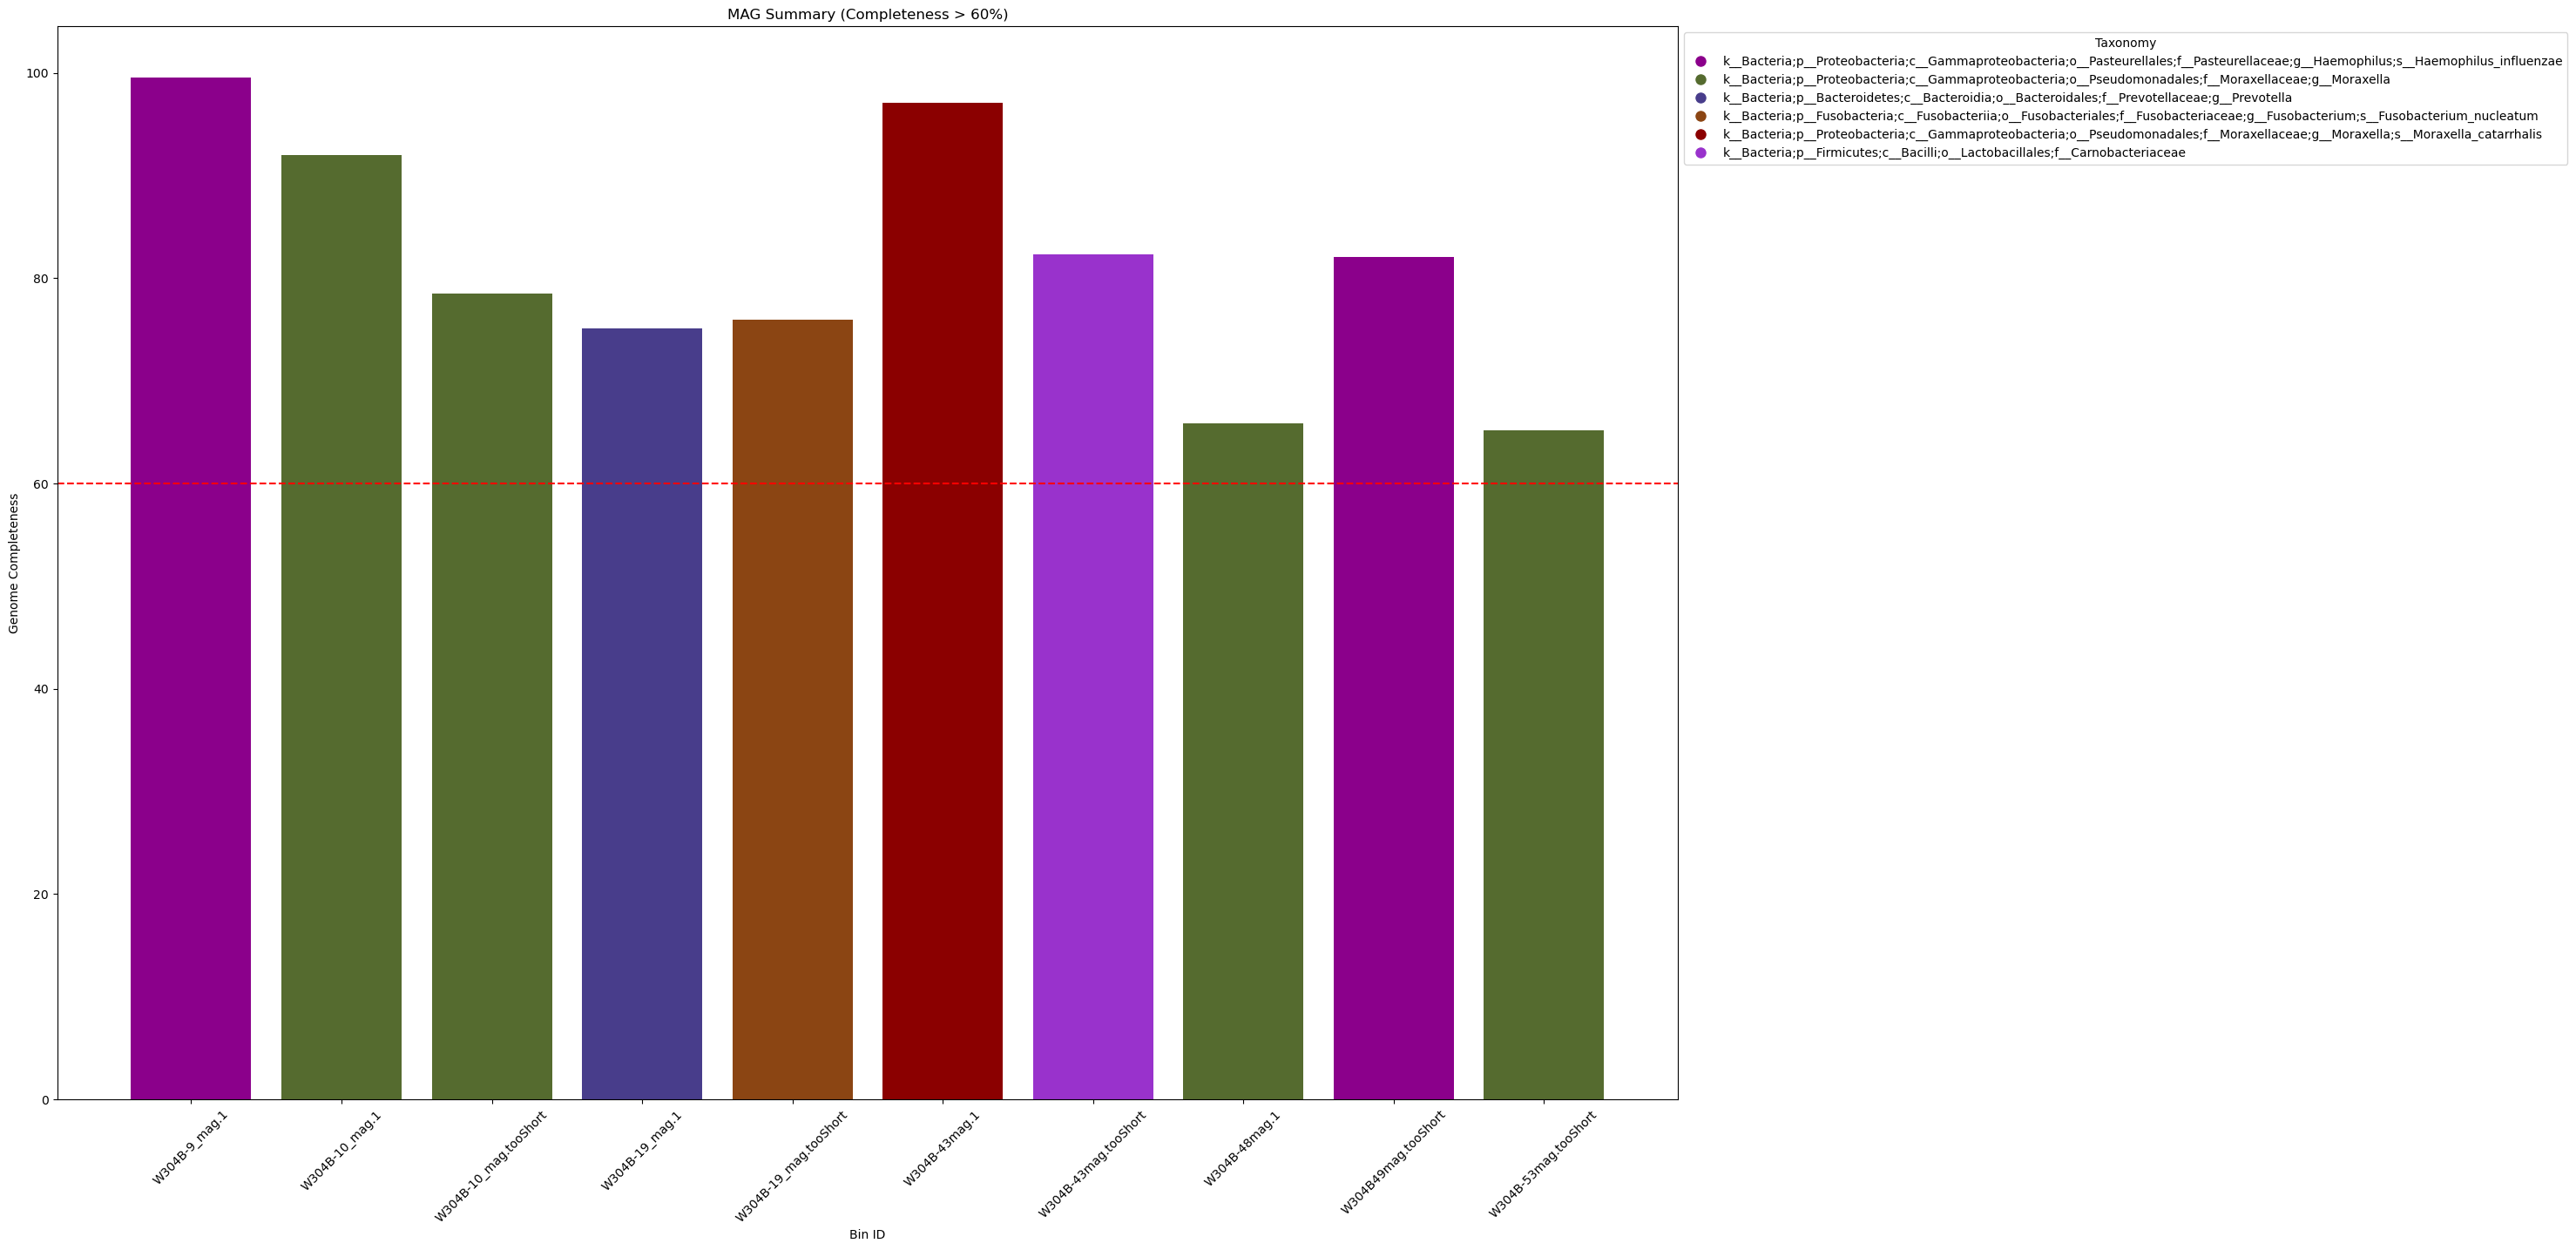

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file into a DataFrame with a comma as the delimiter
file_path = '/Users/jugomez/Documents/CAUSE_Project/Microbial Reads/MAG_SUMMARY_COMBINE.csv'
df = pd.read_csv(file_path, delimiter=',')

# Extract relevant columns for the bar plot
selected_columns = ['Bin Id1', 'Taxonomy', 'Completeness']
df_selected = df[selected_columns]

# Rename the column 'Taxonomy (contained)' to 'Taxonomy'
df_selected = df_selected.rename(columns={'Taxonomy': 'Taxonomy'})

# Set 'Bin Id1' as the index for better readability
df_selected.set_index('Bin Id1', inplace=True)

# Filter rows where Completeness is over 60%
df_selected_over_60 = df_selected[df_selected['Completeness'] > 60]

# Print information on taxa with completeness over 60%
print("Taxa with Completeness over 60%:")
print(df_selected_over_60)

# Create a dictionary to map unique taxonomies to colors
taxonomy_color_mapping = {}
color_index = 0

# Get the number of bars
num_bars = len(df_selected_over_60)

# Specify custom dark pastel colors for each bar
dark_pastel_colors = [
    '#8B008B', '#556B2F', '#483D8B', '#8B4513', '#8B0000', '#9932CC', '#2F4F4F', '#556B2F', '#FF69B4',
    '#800080', '#8FBC8F', '#4169E1', '#A0522D', '#B22222', '#8A2BE2', '#708090', '#2E8B57', '#FF1493', '#C71585'
]

# Plotting with custom colors
fig, ax = plt.subplots(figsize=(24, 16))

legend_handles = []
legend_labels = []

for idx, (bar_id, row) in enumerate(df_selected_over_60.iterrows()):
    taxonomy = row['Taxonomy']
    
    # Check if the taxonomy has been assigned a color
    if taxonomy not in taxonomy_color_mapping:
        # Assign a color and update the mapping
        color = dark_pastel_colors[color_index % len(dark_pastel_colors)]
        taxonomy_color_mapping[taxonomy] = color
        color_index += 1
    else:
        # Use the color assigned to the taxonomy
        color = taxonomy_color_mapping[taxonomy]

    bar = ax.bar(bar_id, row['Completeness'], color=color, width=0.8, label=row['Taxonomy'])
    legend_handles.append(bar)
    legend_labels.append(row['Taxonomy'])

ax.set_xlabel('Bin ID')
ax.set_ylabel('Genome Completeness')
ax.set_title('MAG Summary (Completeness > 60%)')

# Rotate x-axis labels
ax.tick_params(axis='x', rotation=45)

# Set x-axis ticks and labels for better readability
ax.set_xticks(np.arange(num_bars))
ax.set_xticklabels(df_selected_over_60.index)

# Add a legend for each unique taxonomy
unique_taxonomy_legend = []
unique_taxonomy_colors = []

for taxonomy, color in taxonomy_color_mapping.items():
    unique_taxonomy_legend.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10))
    unique_taxonomy_colors.append(taxonomy)

ax.legend(unique_taxonomy_legend, unique_taxonomy_colors, title='Taxonomy', bbox_to_anchor=(1, 1))

# Add a red line at 60% on the y-axis
ax.axhline(y=60, color='red', linestyle='--', label='60% Completeness')

plt.show()


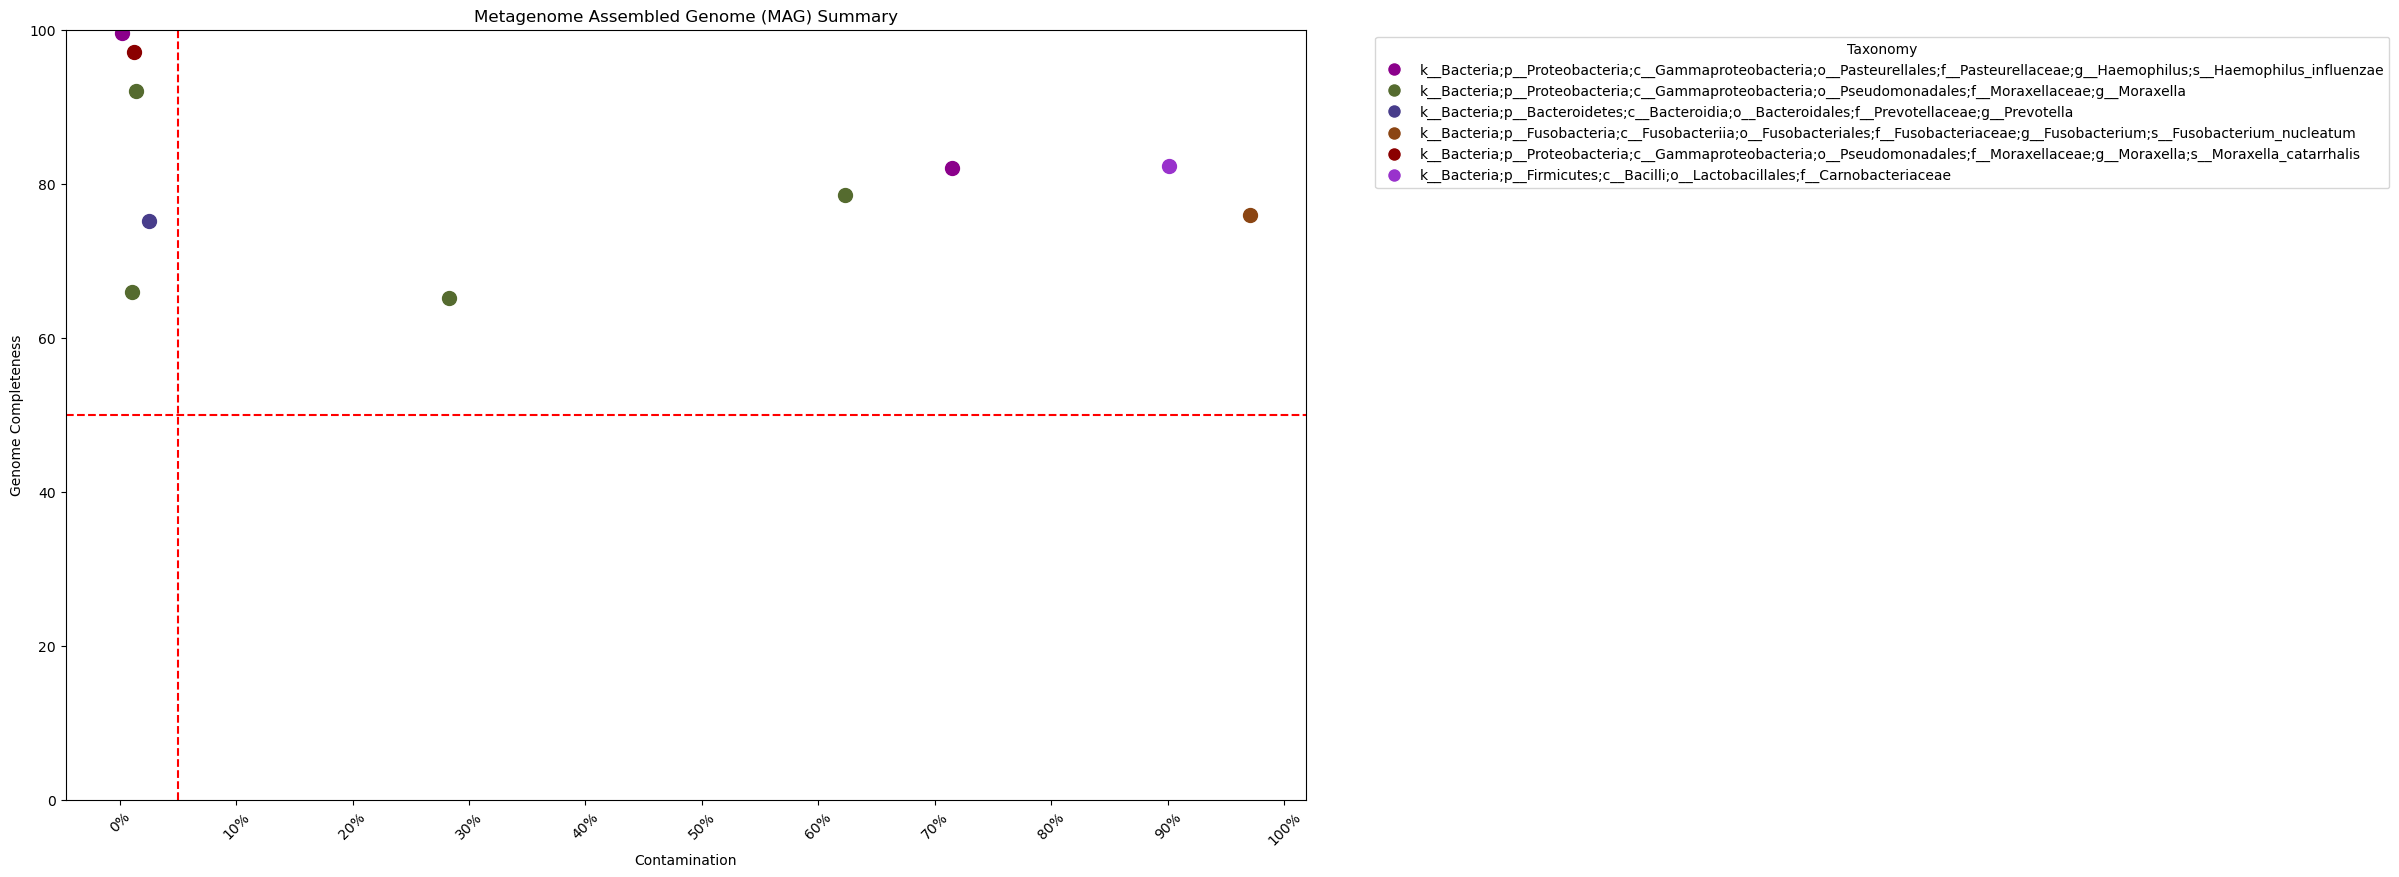

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file into a DataFrame with a comma as the delimiter
file_path = '/Users/jugomez/Documents/CAUSE_Project/Microbial Reads/MAG_SUMMARY_COMBINE.csv'
df = pd.read_csv(file_path, delimiter=',')

# Extract relevant columns for the scatter plot
selected_columns = ['Bin Id1', 'Taxonomy', 'Completeness', 'Contamination']
df_selected = df[selected_columns]

# Rename the column 'Taxonomy (contained)' to 'Taxonomy'
df_selected = df_selected.rename(columns={'Taxonomy': 'Taxonomy'})

# Filter rows where Completeness is over 60%
df_selected_over_60 = df_selected[df_selected['Completeness'] > 60]

# Create a dictionary to map unique taxonomies to colors
taxonomy_color_mapping = {}
color_index = 0

# Get the number of points
num_points = len(df_selected_over_60)

# Specify custom dark pastel colors for each point
dark_pastel_colors = [
    '#8B008B', '#556B2F', '#483D8B', '#8B4513', '#8B0000', '#9932CC', '#2F4F4F', '#556B2F', '#FF69B4',
    '#800080', '#8FBC8F', '#4169E1', '#A0522D', '#B22222', '#8A2BE2', '#708090', '#2E8B57', '#FF1493', '#C71585'
]

# Plotting with custom colors
fig, ax = plt.subplots(figsize=(16, 10))

legend_handles = []
legend_labels = []

for idx, (_, row) in enumerate(df_selected_over_60.iterrows()):
    taxonomy = row['Taxonomy']
    
    # Check if the taxonomy has been assigned a color
    if taxonomy not in taxonomy_color_mapping:
        # Assign a color and update the mapping
        color = dark_pastel_colors[color_index % len(dark_pastel_colors)]
        taxonomy_color_mapping[taxonomy] = color
        color_index += 1
    else:
        # Use the color assigned to the taxonomy
        color = taxonomy_color_mapping[taxonomy]

    point = ax.scatter(row['Contamination'], row['Completeness'], color=color, s=100, label=row['Taxonomy'])
    legend_handles.append(point)
    legend_labels.append(row['Taxonomy'])

ax.set_xlabel('Contamination')
ax.set_ylabel('Genome Completeness')
ax.set_title('Metagenome Assembled Genome (MAG) Summary')

# Set y-axis limits from 0 to 100
ax.set_ylim(0, 100)

# Rotate x-axis labels
ax.tick_params(axis='x', rotation=45)

# Set x-axis ticks and labels for better readability
ax.set_xticks(np.arange(0, 101, 10))
ax.set_xticklabels([f'{x}%' for x in range(0, 101, 10)])

# Add a legend for each unique taxonomy
unique_taxonomy_legend = []
unique_taxonomy_colors = []

for taxonomy, color in taxonomy_color_mapping.items():
    unique_taxonomy_legend.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10))
    unique_taxonomy_colors.append(taxonomy)

# Add a red dashed line at 10% contamination
ax.axvline(x=5, color='red', linestyle='--', label='5% Contamination')

# Add a red line at 60% on the y-axis
ax.axhline(y=50, color='red', linestyle='--', label='50% Completeness')

# Move legend outside the plot
ax.legend(handles=unique_taxonomy_legend, labels=unique_taxonomy_colors, title='Taxonomy', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file into a DataFrame with a comma as the delimiter
file_path = '/Users/jugomez/Documents/CAUSE_Project/Nephele Input mapping file/CAUSE_nephele_mapping_file_100223.csv'
metadata = pd.read_csv(file_path, delimiter=',')


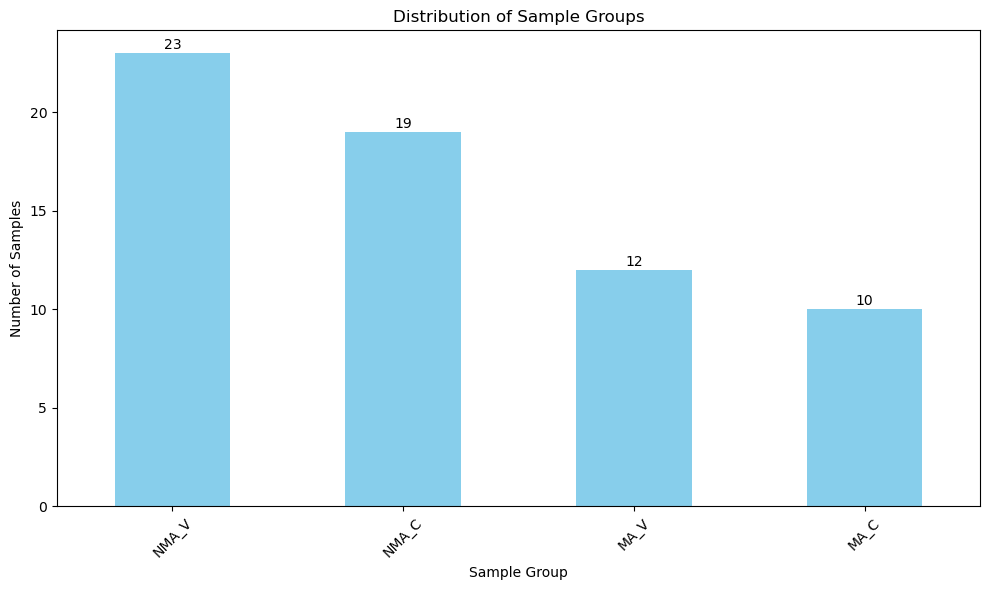

In [92]:
import matplotlib.pyplot as plt

# Count the number of samples per treatment group
group_counts = metadata['TreatmentGroup'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
bars = group_counts.plot(kind='bar', color='skyblue')

# Add counts on top of bars
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, 
             f'{int(bar.get_height())}', ha='center', va='bottom')

plt.title('Distribution of Sample Groups')
plt.xlabel('Sample Group')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
